# Data Sharing Market Implementation

### Utils 

In [1]:
from DSC.app import DSCPlatform 
from dataset.util import install_hotel_booking_dataset

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


install_hotel_booking_dataset()

[2025-04-21 21:43:33] COUNTRY PRT 	 LOADED
[2025-04-21 21:43:33] COUNTRY GBR 	 LOADED
[2025-04-21 21:43:33] COUNTRY FRA 	 LOADED
[2025-04-21 21:43:33] COUNTRY ESP 	 LOADED
[2025-04-21 21:43:33] COUNTRY DEU 	 LOADED


In [2]:
def ordinal(n):
    suffix = ["th", "st", "nd", "rd", "th"][min(n % 10, 4)]  
    if 10 <= (n % 100) <= 20: 
        suffix = "th"
    return f"{n}{suffix}"

### Reproduced Result

In [3]:
platform = DSCPlatform(
    config_path="DSC\config\config_full.yaml", 
    dataset_path="dataset",
    robustness= "greedy",
    verbose= True
    )

platform.install_data()
entitlement = platform.allocate_revenue()


# Evaluating
result= platform.evaluate_robustness()

print(f"Consortium Entitlement: {entitlement}")
print(result)

[2025-04-21 21:43:33] INITIATING 	 CONFIG: DSC\config\config_full.yaml
[2025-04-21 21:44:33] PARTICIPANT 0 	 PAYOFF:0.8806584362139918
[2025-04-21 21:45:27] PARTICIPANT 1 	 PAYOFF:0.8768961493582264
[2025-04-21 21:46:21] PARTICIPANT 2 	 PAYOFF:0.8670187229956793
[2025-04-21 21:47:17] PARTICIPANT 3 	 PAYOFF:0.8841714756801319
[2025-04-21 21:48:46] PARTICIPANT 4 	 PAYOFF:0.8822803045894216
[2025-04-21 21:48:46] SETUP 		 RUNTIME: 312.75s.
[2025-04-21 21:50:35] CONSORTIUM 	 PAYOFF:0.8265417552732915
[2025-04-21 21:55:46] PARTICIPANT 2 	 DOWNGRADE PAYOFF DIFF:-0.03204
[2025-04-21 21:55:46] REMOVE 		 PARTICIPANT 2
[2025-04-21 21:59:03] PARTICIPANT 1 	 DOWNGRADE PAYOFF DIFF:-0.00071
[2025-04-21 21:59:03] REMOVE 		 PARTICIPANT 1
[2025-04-21 22:02:09] PARTICIPANT 3 	 DOWNGRADE PAYOFF DIFF:-0.01813
[2025-04-21 22:02:09] REMOVE 		 PARTICIPANT 3
[2025-04-21 22:03:37] PARTICIPANT 0 	 DOWNGRADE PAYOFF DIFF:-0.00486
[2025-04-21 22:03:37] REMOVE 		 PARTICIPANT 0
[2025-04-21 22:05:05] ALLOCATION 	 RUNT

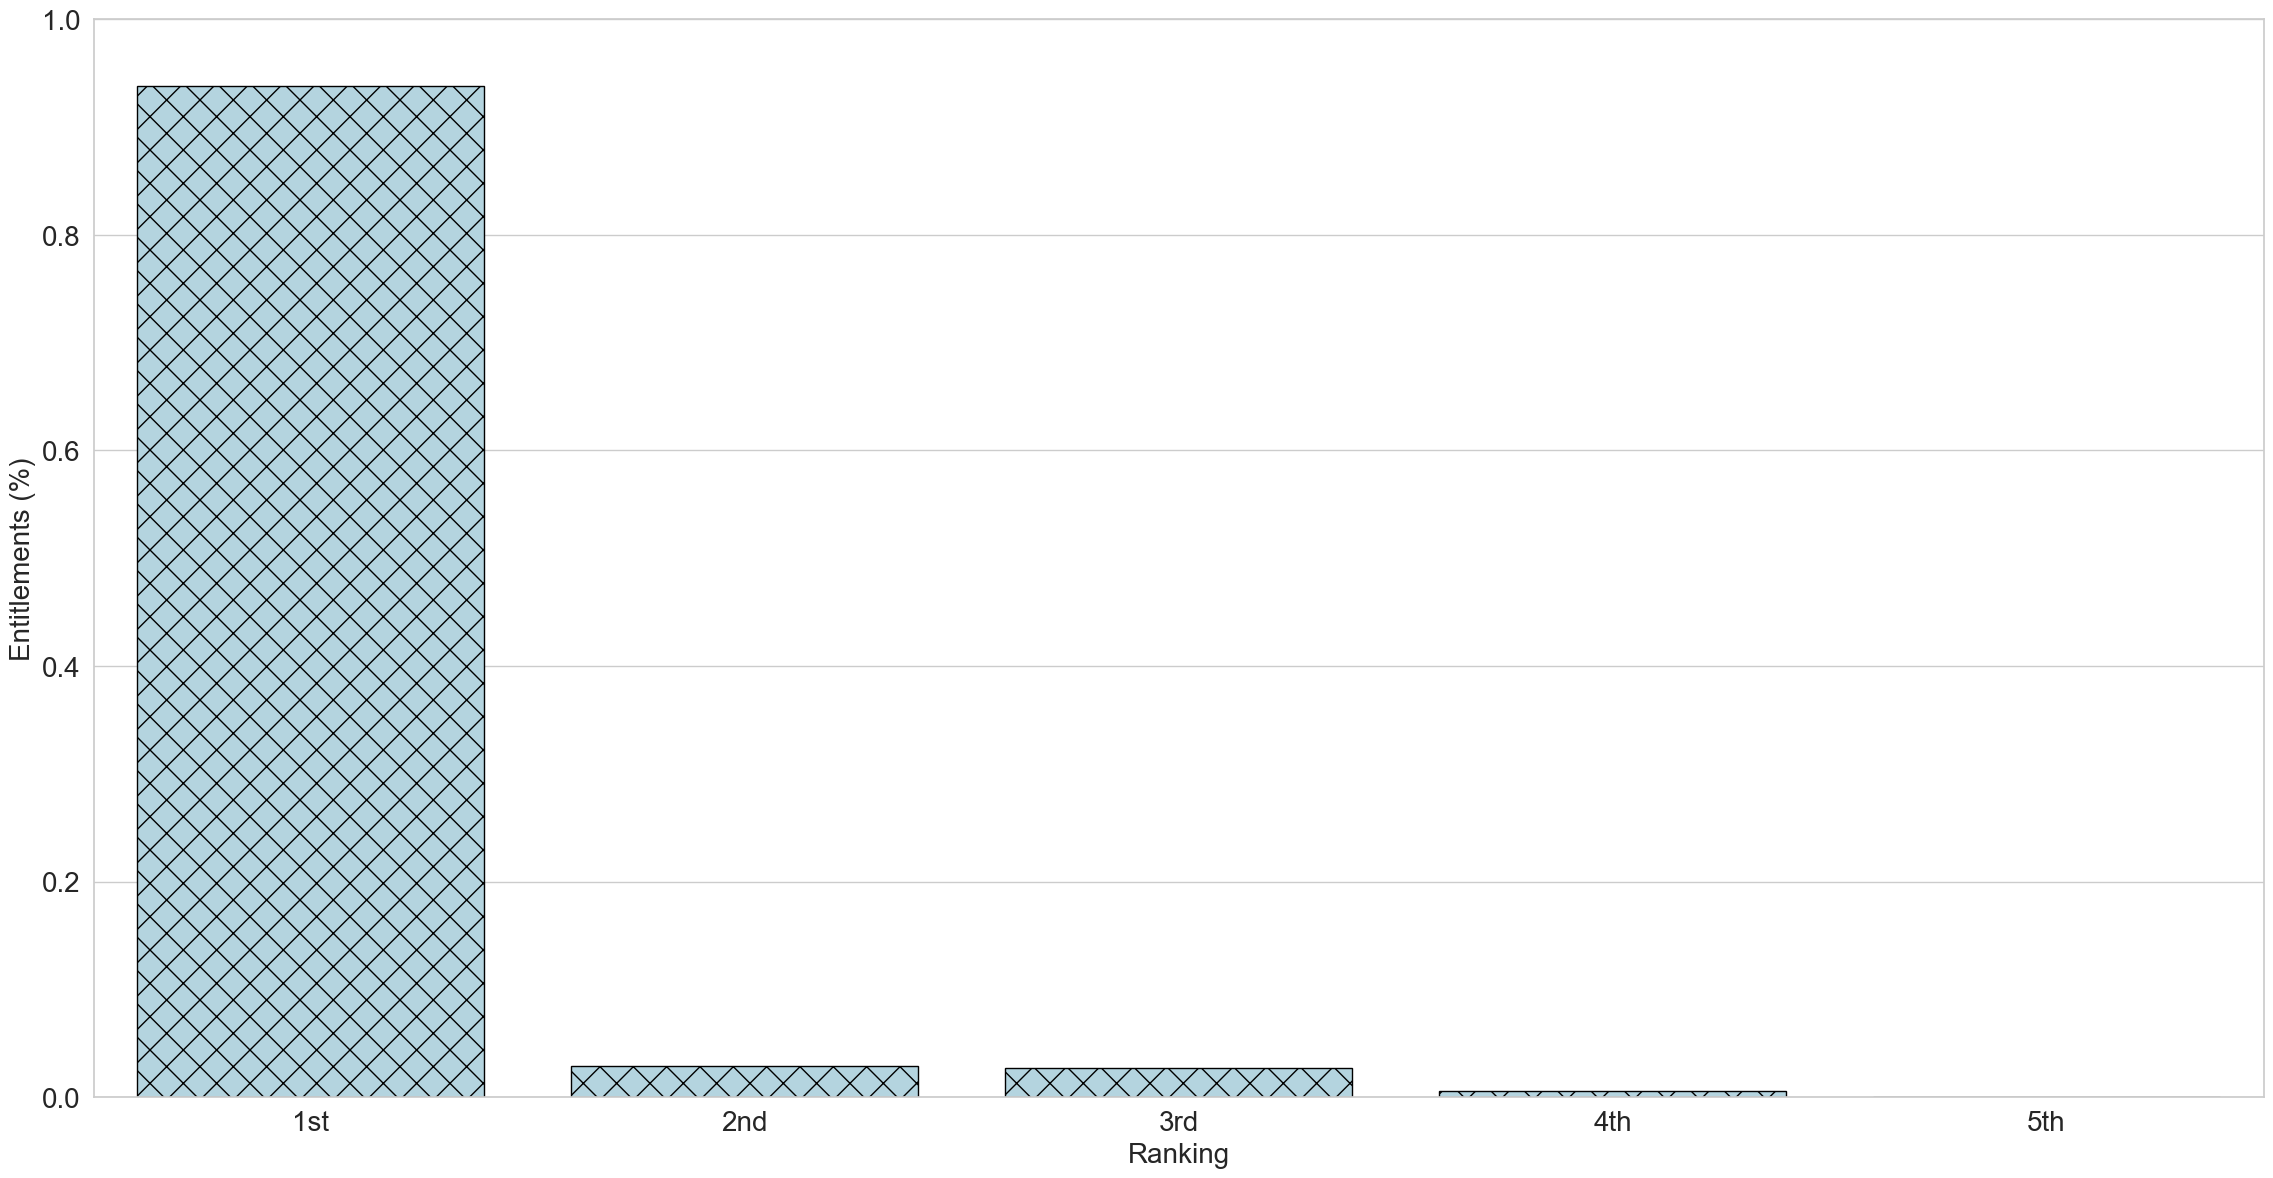

In [5]:
sorted_result = dict(sorted(entitlement[0].items(), key=lambda item: item[1], reverse=True))
x = list(sorted_result.keys())
y = [value / 100 for value in sorted_result.values()]  


rankings = [ordinal(i+1) for i in range(len(sorted_result))]

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(28, 14))
sns.barplot(x=rankings, y=y, color='lightblue', edgecolor='black', hatch='x', ax=ax)

ax.set_xlabel('Ranking',fontsize=20)
ax.set_ylabel('Entitlements (%)',fontsize=20)

ax.set_yticks([i * 0.2 for i in range(6)]) 
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)

plt.show()

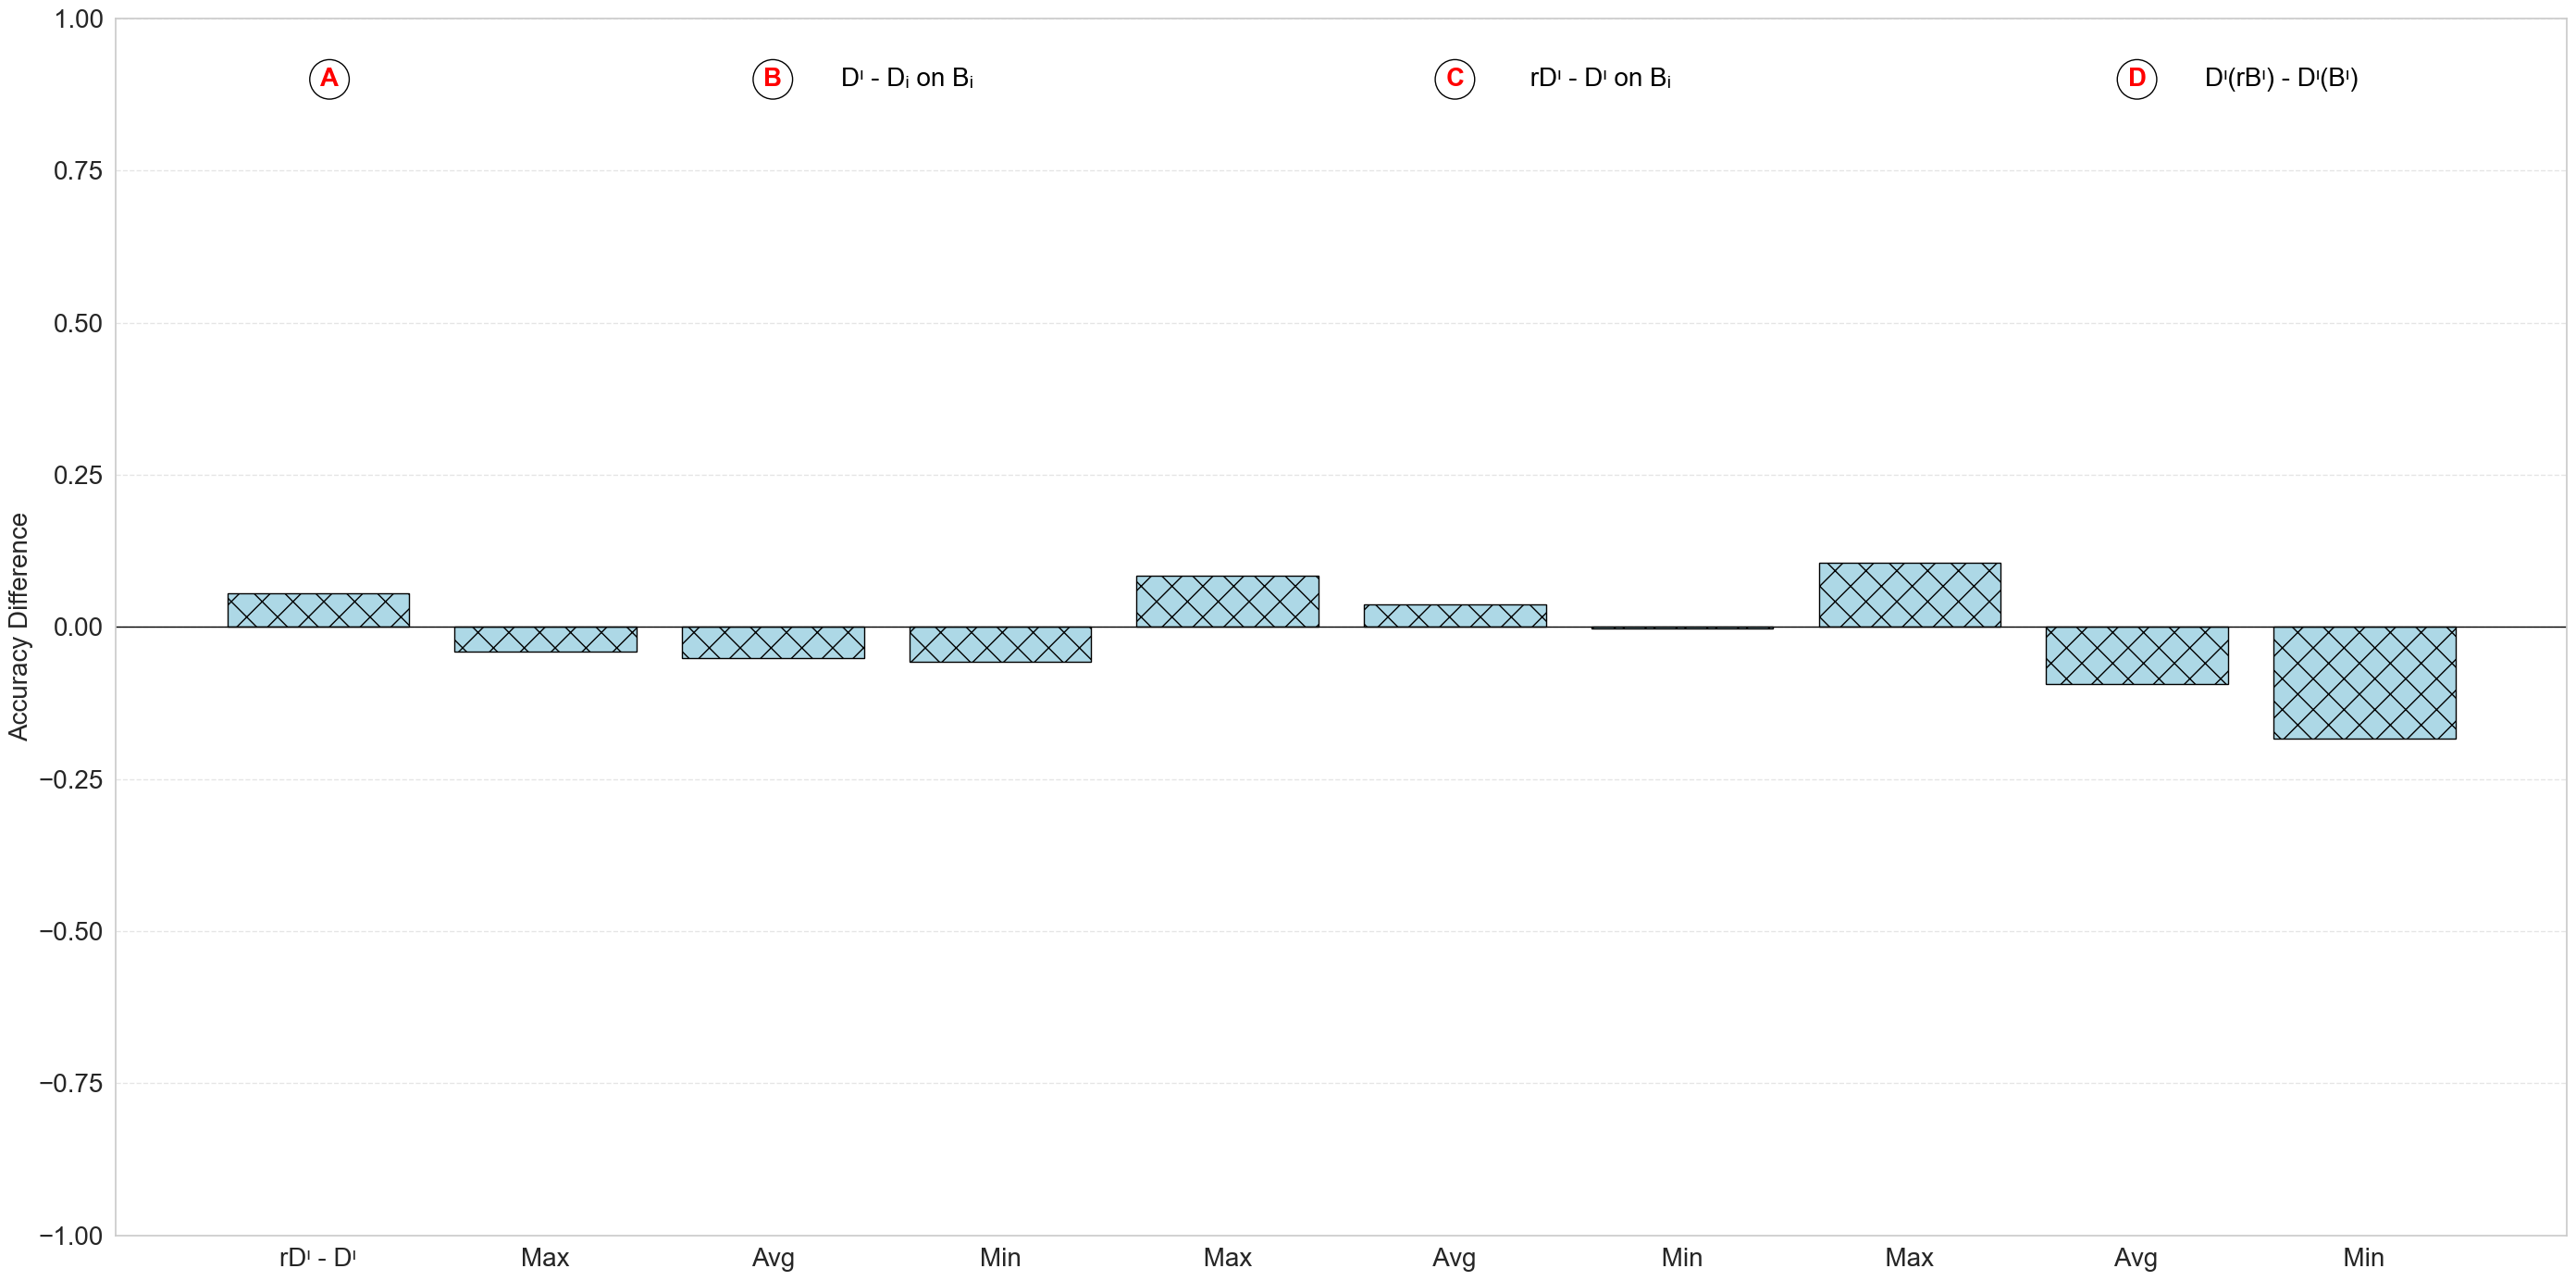

In [6]:
A = result["A"]
B = result["B"]
C = result["C"]
D = result["D"]
categories = [
    "rDᶦ - Dᶦ", "Max", "Avg", "Min",
    " Max ", " Avg ", " Min ",
    "  Max  ", "  Avg  ", "  Min  "
]
values = [A, np.max(B), np.mean(B), np.min(B), np.max(C), np.mean(C), np.min(C), np.max(D), np.mean(D), np.min(D)]


group_labels = ["A", "B", "C", "D"]
group_tag = ["","Dᶦ - Dᵢ on Bᵢ", " rDᶦ - Dᶦ on Bᵢ", "Dᶦ(rBᶦ) - Dᶦ(Bᶦ)"]
group_positions = [0.05, 2, 5, 8]  


fig, ax = plt.subplots(figsize=(28, 14))
bars = ax.bar(categories, values, color='lightblue', edgecolor='black', hatch='x')

ax.axhline(0, color='black', linewidth=1)


for i, label in enumerate(group_labels):
    ax.text(group_positions[i], 0.9, label, ha='center', va='center',
            fontsize=20, color='red', fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='circle'))
    
    ax.text(group_positions[i]+0.3, 0.9, group_tag[i],  
            ha='left', va='center',
            fontsize=20, color='black')

ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, ha="center", fontsize=20)
ax.set_ylabel("Accuracy Difference",fontsize=20)
ax.set_ylim(-1, 1)

ax.yaxis.grid(True, linestyle="--", alpha=0.5) 
ax.xaxis.grid(False) 
ax.tick_params(axis='y', labelsize=20)
plt.tight_layout()
plt.show()


### Experiment: Breadth robustness (Filter highest payoff difference first)

In [7]:
exp_platform = DSCPlatform(
    config_path="DSC\config\config_full.yaml", 
    dataset_path="dataset",
    robustness= "breadth",
    verbose= True
    )

exp_platform.install_data()
exp_entitlement = exp_platform.allocate_revenue()


# Evaluating
exp_result = exp_platform.evaluate_robustness()

print(f"Consortium Entitlement: {exp_entitlement}")
print(exp_result)

[2025-04-21 22:14:33] INITIATING 	 CONFIG: DSC\config\config_full.yaml
[2025-04-21 22:15:30] PARTICIPANT 0 	 PAYOFF:0.8806584362139918
[2025-04-21 22:16:21] PARTICIPANT 1 	 PAYOFF:0.8768961493582264
[2025-04-21 22:17:14] PARTICIPANT 2 	 PAYOFF:0.8670187229956793
[2025-04-21 22:18:08] PARTICIPANT 3 	 PAYOFF:0.8841714756801319
[2025-04-21 22:19:34] PARTICIPANT 4 	 PAYOFF:0.8822803045894216
[2025-04-21 22:19:34] SETUP 		 RUNTIME: 301.37s.
[2025-04-21 22:21:24] CONSORTIUM 	 PAYOFF:0.8265417552732915
[2025-04-21 22:26:38] PARTICIPANT 2  	 DOWNGRADE PAYOFF DIFF:-0.03204
[2025-04-21 22:29:44] PARTICIPANT 4  	 DOWNGRADE PAYOFF DIFF:-0.05407
[2025-04-21 22:29:44] REMOVE 		 PARTICIPANT 4
[2025-04-21 22:32:17] PARTICIPANT 1  	 DOWNGRADE PAYOFF DIFF:-0.00308
[2025-04-21 22:33:31] PARTICIPANT 2  	 DOWNGRADE PAYOFF DIFF:-0.00131
[2025-04-21 22:34:44] REMOVE 		 PARTICIPANT 1
[2025-04-21 22:37:10] PARTICIPANT 2  	 DOWNGRADE PAYOFF DIFF:-0.00431
[2025-04-21 22:38:19] REMOVE 		 PARTICIPANT 2
[2025-04-21

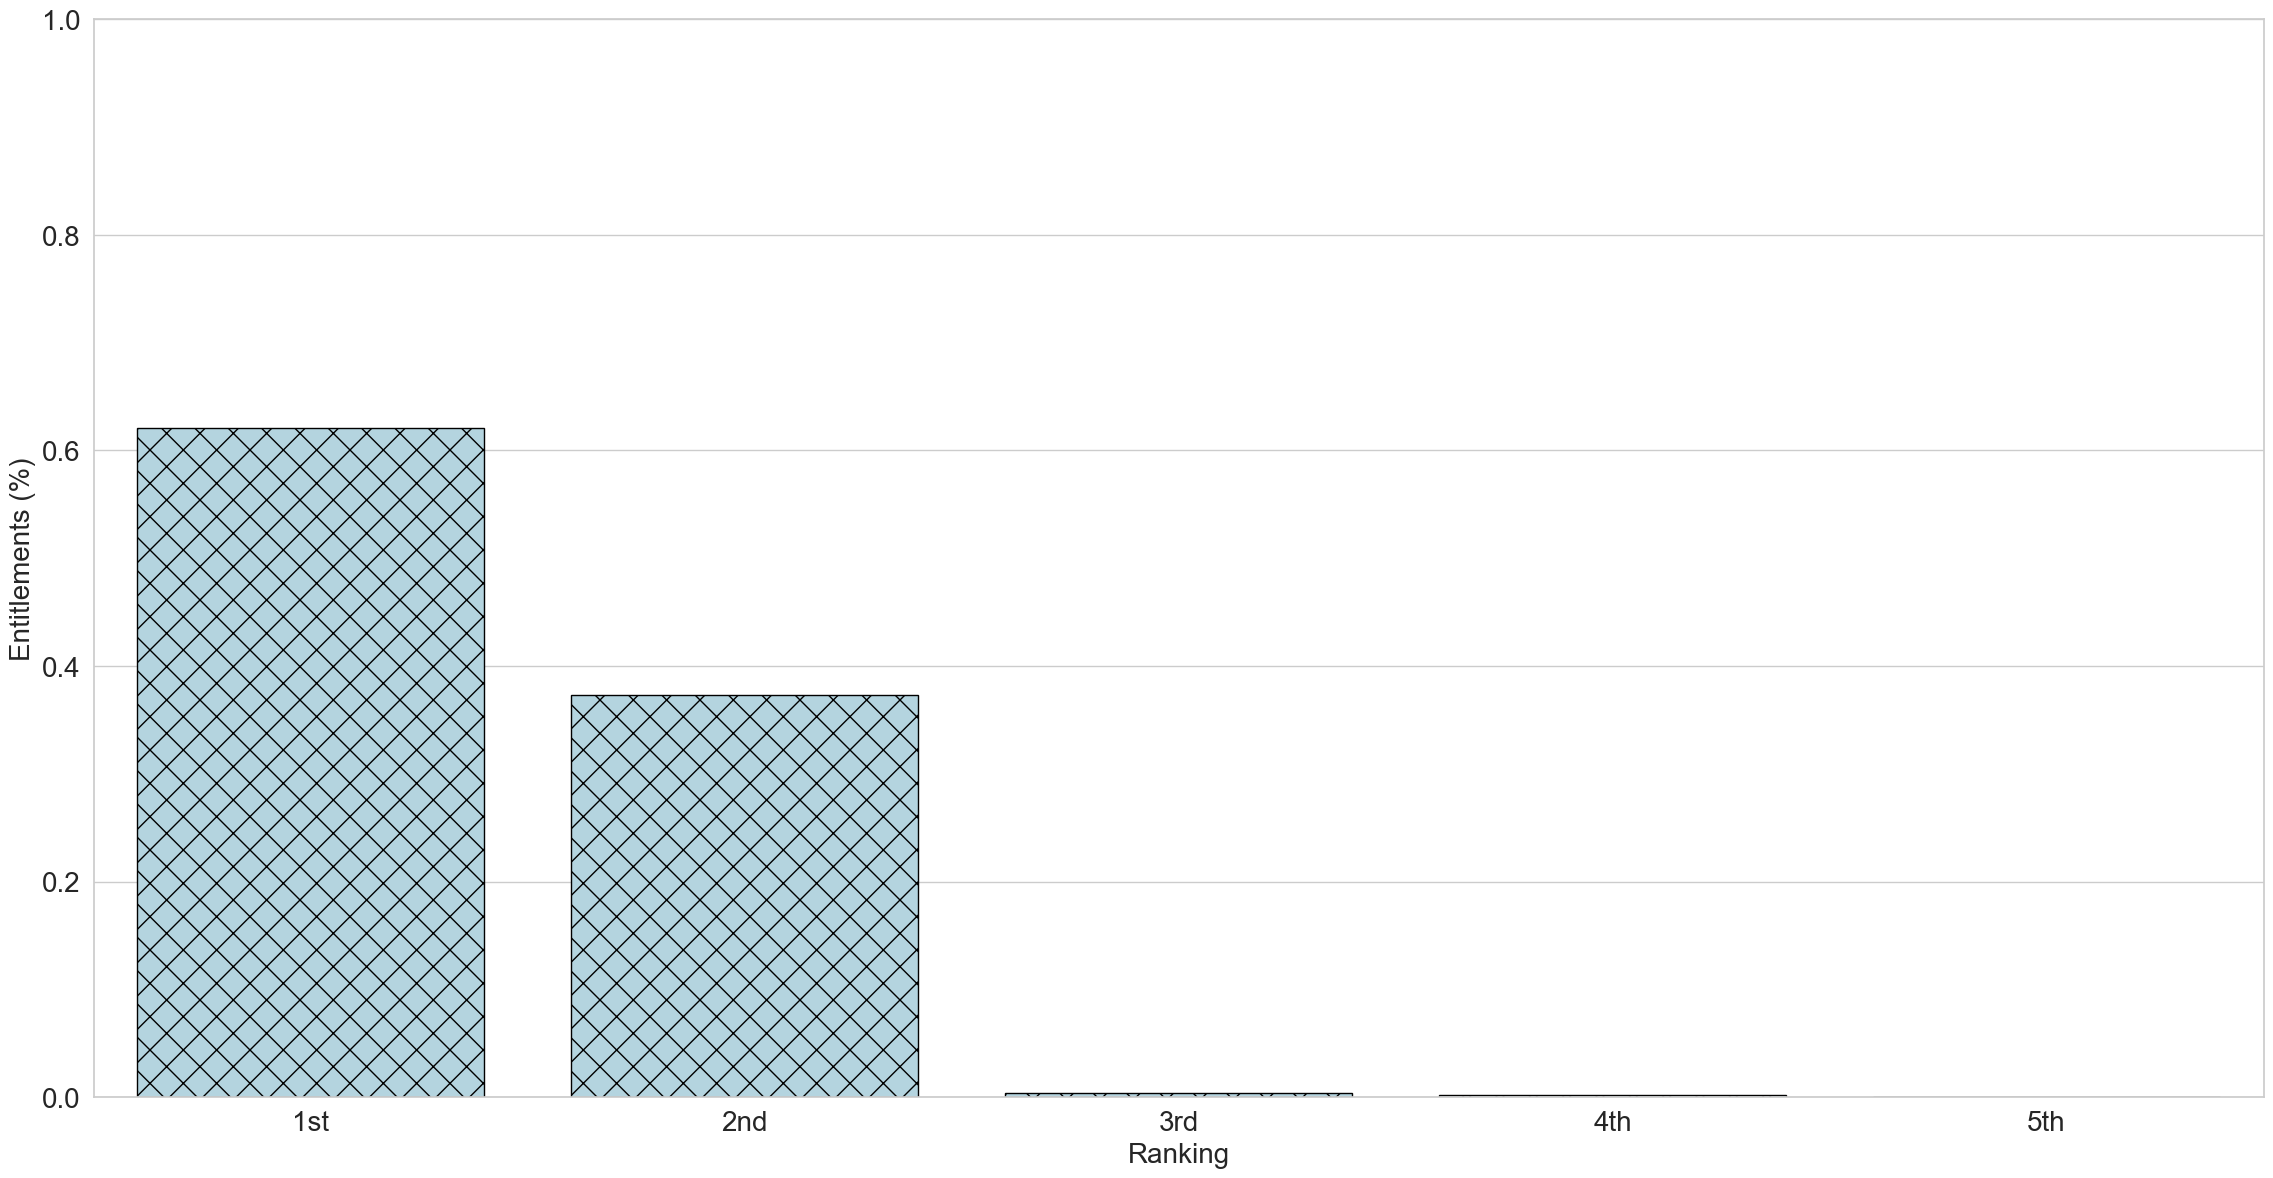

In [8]:
sorted_result = dict(sorted(exp_entitlement[0].items(), key=lambda item: item[1], reverse=True))
x = list(sorted_result.keys())
y = [value / 100 for value in sorted_result.values()]  


rankings = [ordinal(i+1) for i in range(len(sorted_result))]

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(28, 14))
sns.barplot(x=rankings, y=y, color='lightblue', edgecolor='black', hatch='x', ax=ax)

ax.set_xlabel('Ranking',fontsize=20)
ax.set_ylabel('Entitlements (%)',fontsize=20)

ax.set_yticks([i * 0.2 for i in range(6)]) 
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)

plt.show()

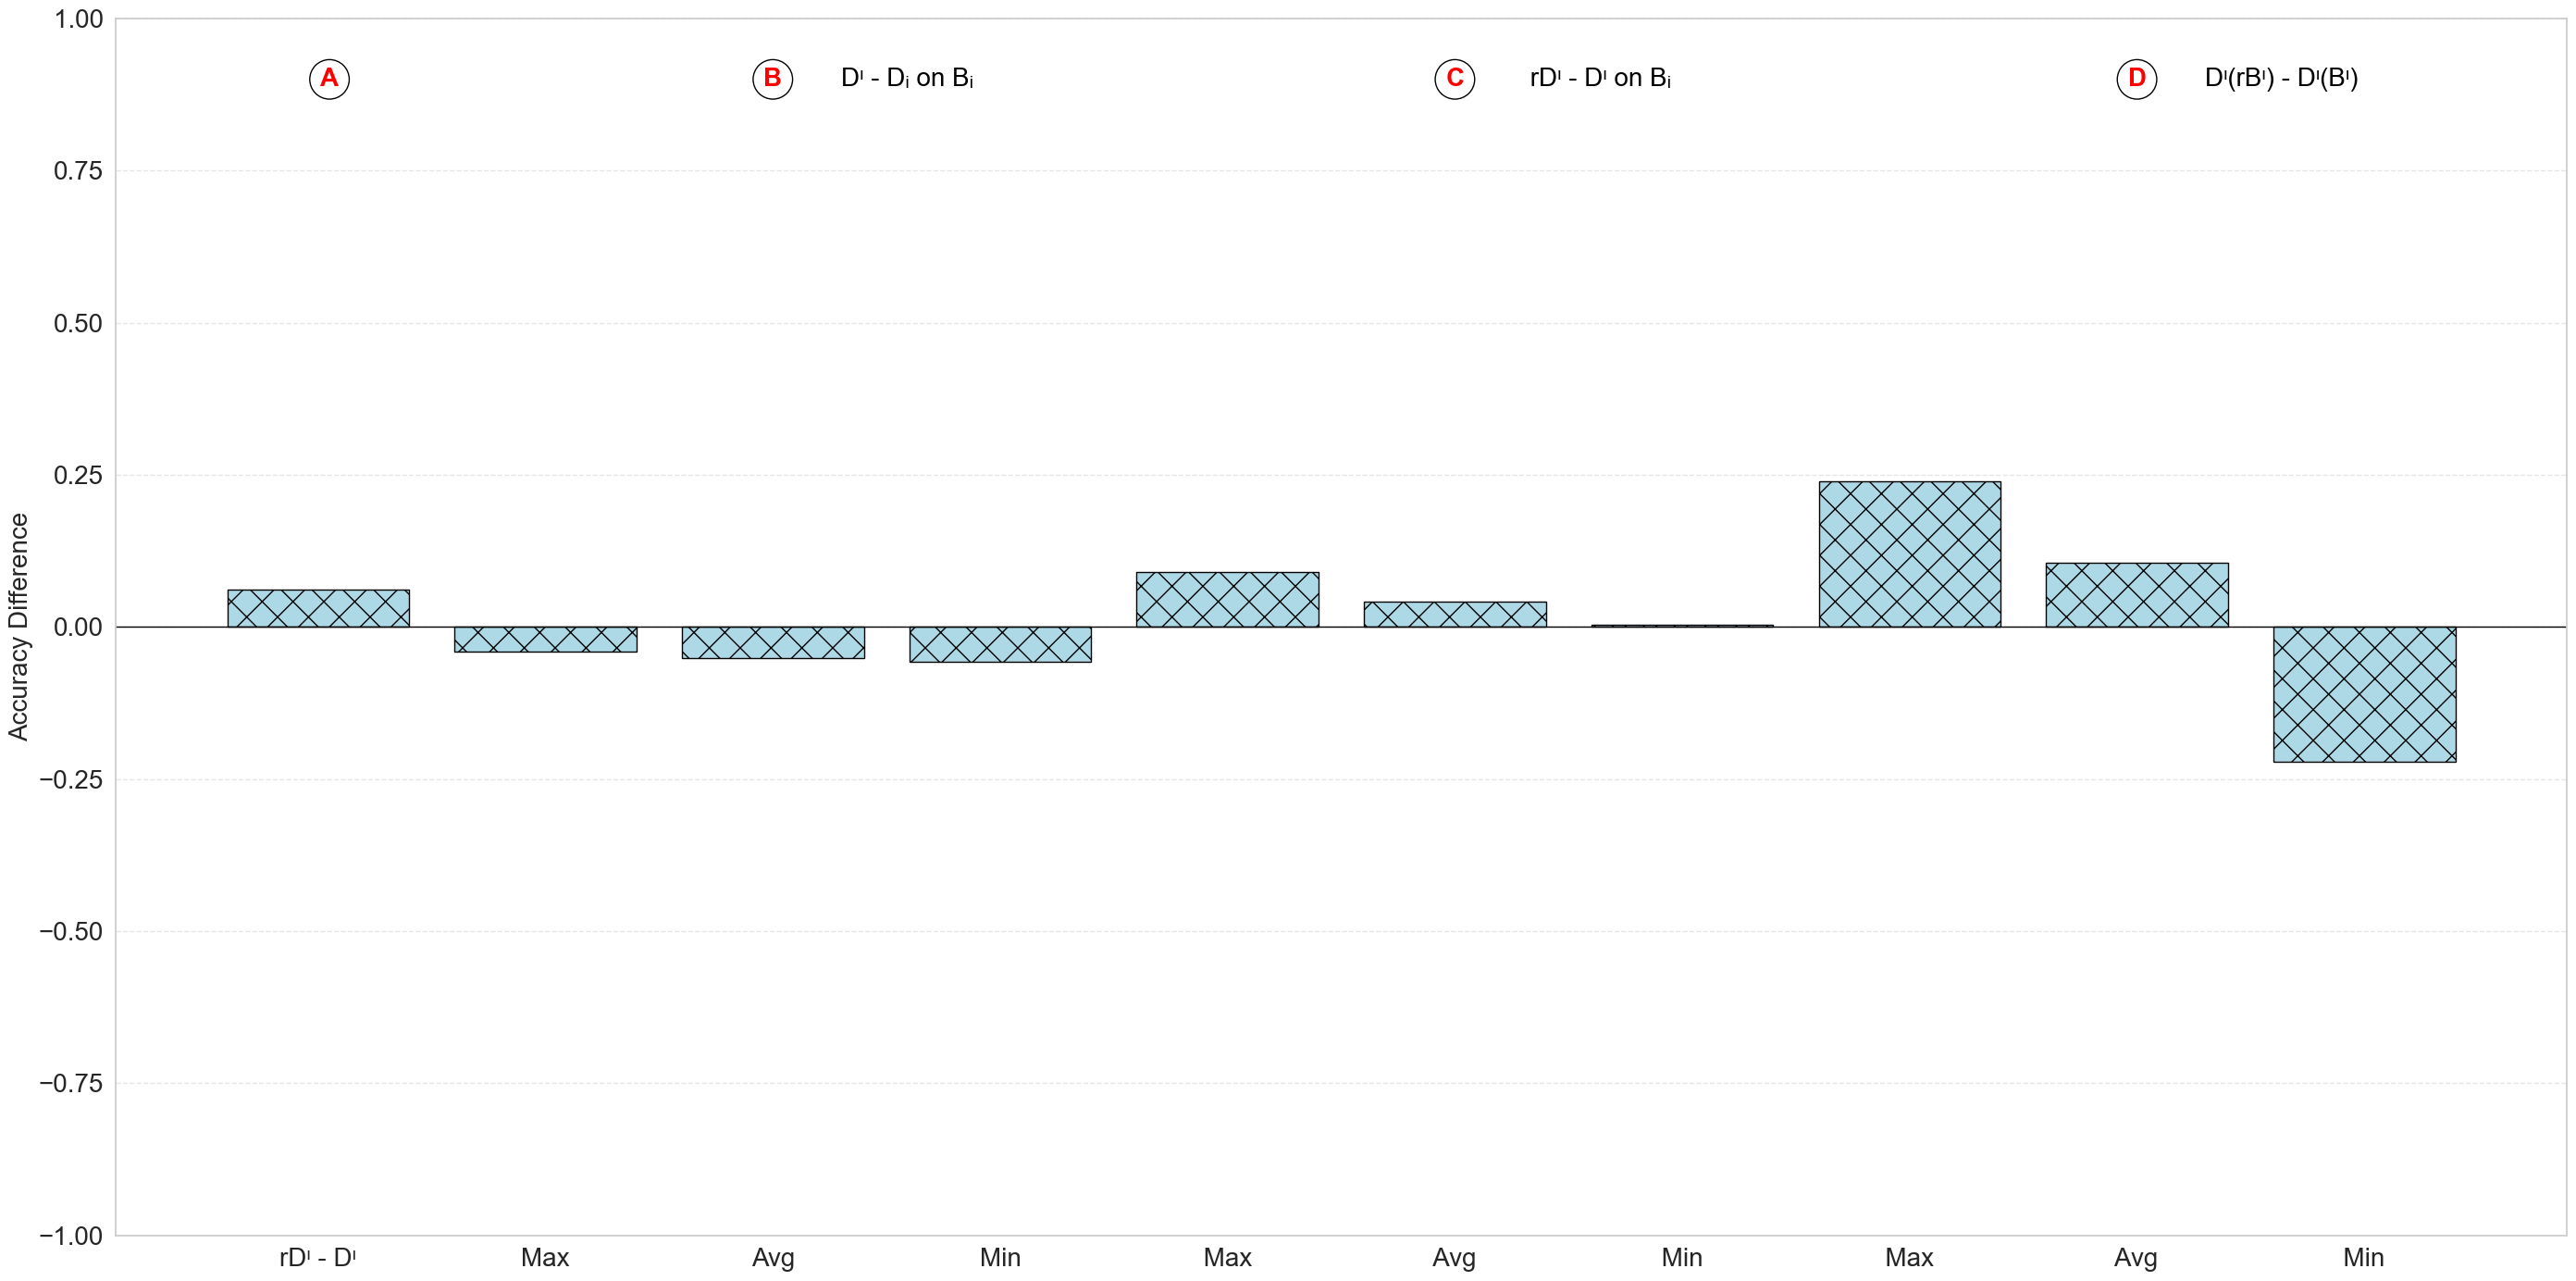

In [9]:
A = exp_result["A"]
B = exp_result["B"]
C = exp_result["C"]
D = exp_result["D"]
categories = [
    "rDᶦ - Dᶦ", "Max", "Avg", "Min",
    " Max ", " Avg ", " Min ",
    "  Max  ", "  Avg  ", "  Min  "
]
values = [A, np.max(B), np.mean(B), np.min(B), np.max(C), np.mean(C), np.min(C), np.max(D), np.mean(D), np.min(D)]


group_labels = ["A", "B", "C", "D"]
group_tag = ["","Dᶦ - Dᵢ on Bᵢ", " rDᶦ - Dᶦ on Bᵢ", "Dᶦ(rBᶦ) - Dᶦ(Bᶦ)"]
group_positions = [0.05, 2, 5, 8]  


fig, ax = plt.subplots(figsize=(28, 14))
bars = ax.bar(categories, values, color='lightblue', edgecolor='black', hatch='x')

ax.axhline(0, color='black', linewidth=1)


for i, label in enumerate(group_labels):
    ax.text(group_positions[i], 0.9, label, ha='center', va='center',
            fontsize=20, color='red', fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='circle'))
    
    ax.text(group_positions[i]+0.3, 0.9, group_tag[i],  
            ha='left', va='center',
            fontsize=20, color='black')

ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, ha="center", fontsize=20)
ax.set_ylabel("Accuracy Difference",fontsize=20)
ax.set_ylim(-1, 1)

ax.yaxis.grid(True, linestyle="--", alpha=0.5) 
ax.xaxis.grid(False) 
ax.tick_params(axis='y', labelsize=20)
plt.tight_layout()
plt.show()


### Evaluate Runtime

In [ ]:
DSC_instance = DSCPlatform(
    config_path="DSC\config\config_full.yaml", 
    dataset_path="dataset",
    robustness= "greedy",
    verbose= True
)

result = DSC_instance.evaluate_runtime()
result

[2025-04-12 15:59:29] INITIATING 	 CONFIG: DSC\config\config_full.yaml
[2025-04-12 15:59:29] INITIATING 	 CONFIG: DSC\config\config_3.yaml
[2025-04-12 16:00:16] PARTICIPANT 0 	 PAYOFF:0.8806584362139918
[2025-04-12 16:01:07] PARTICIPANT 1 	 PAYOFF:0.8768961493582264
[2025-04-12 16:01:51] PARTICIPANT 2 	 PAYOFF:0.8670187229956793
[2025-04-12 16:01:51] SETUP 		 RUNTIME: 142.06s.
[2025-04-12 16:03:08] CONSORTIUM 	 PAYOFF:0.8782112274024738
[2025-04-12 16:06:34] PARTICIPANT 2 	 DOWNGRADE PAYOFF DIFF:-0.00136
[2025-04-12 16:06:34] REMOVE 		 PARTICIPANT 2
[2025-04-12 16:07:52] PARTICIPANT 1 	 DOWNGRADE PAYOFF DIFF:-0.00109
[2025-04-12 16:07:52] REMOVE 		 PARTICIPANT 1
[2025-04-12 16:08:30] ALLOCATION 	 RUNTIME: 399.07s.
[2025-04-12 16:08:30] INITIATING 	 CONFIG: DSC\config\config_4.yaml
[2025-04-12 16:09:10] PARTICIPANT 0 	 PAYOFF:0.8806584362139918
[2025-04-12 16:09:46] PARTICIPANT 1 	 PAYOFF:0.8768961493582264
[2025-04-12 16:10:20] PARTICIPANT 2 	 PAYOFF:0.8670187229956793
[2025-04-12 16:1

{3: [142.0575008392334, 399.0696520805359],
 4: [144.72341442108154, 435.2681477069855],
 5: [205.51929712295532, 859.3124630451202]}

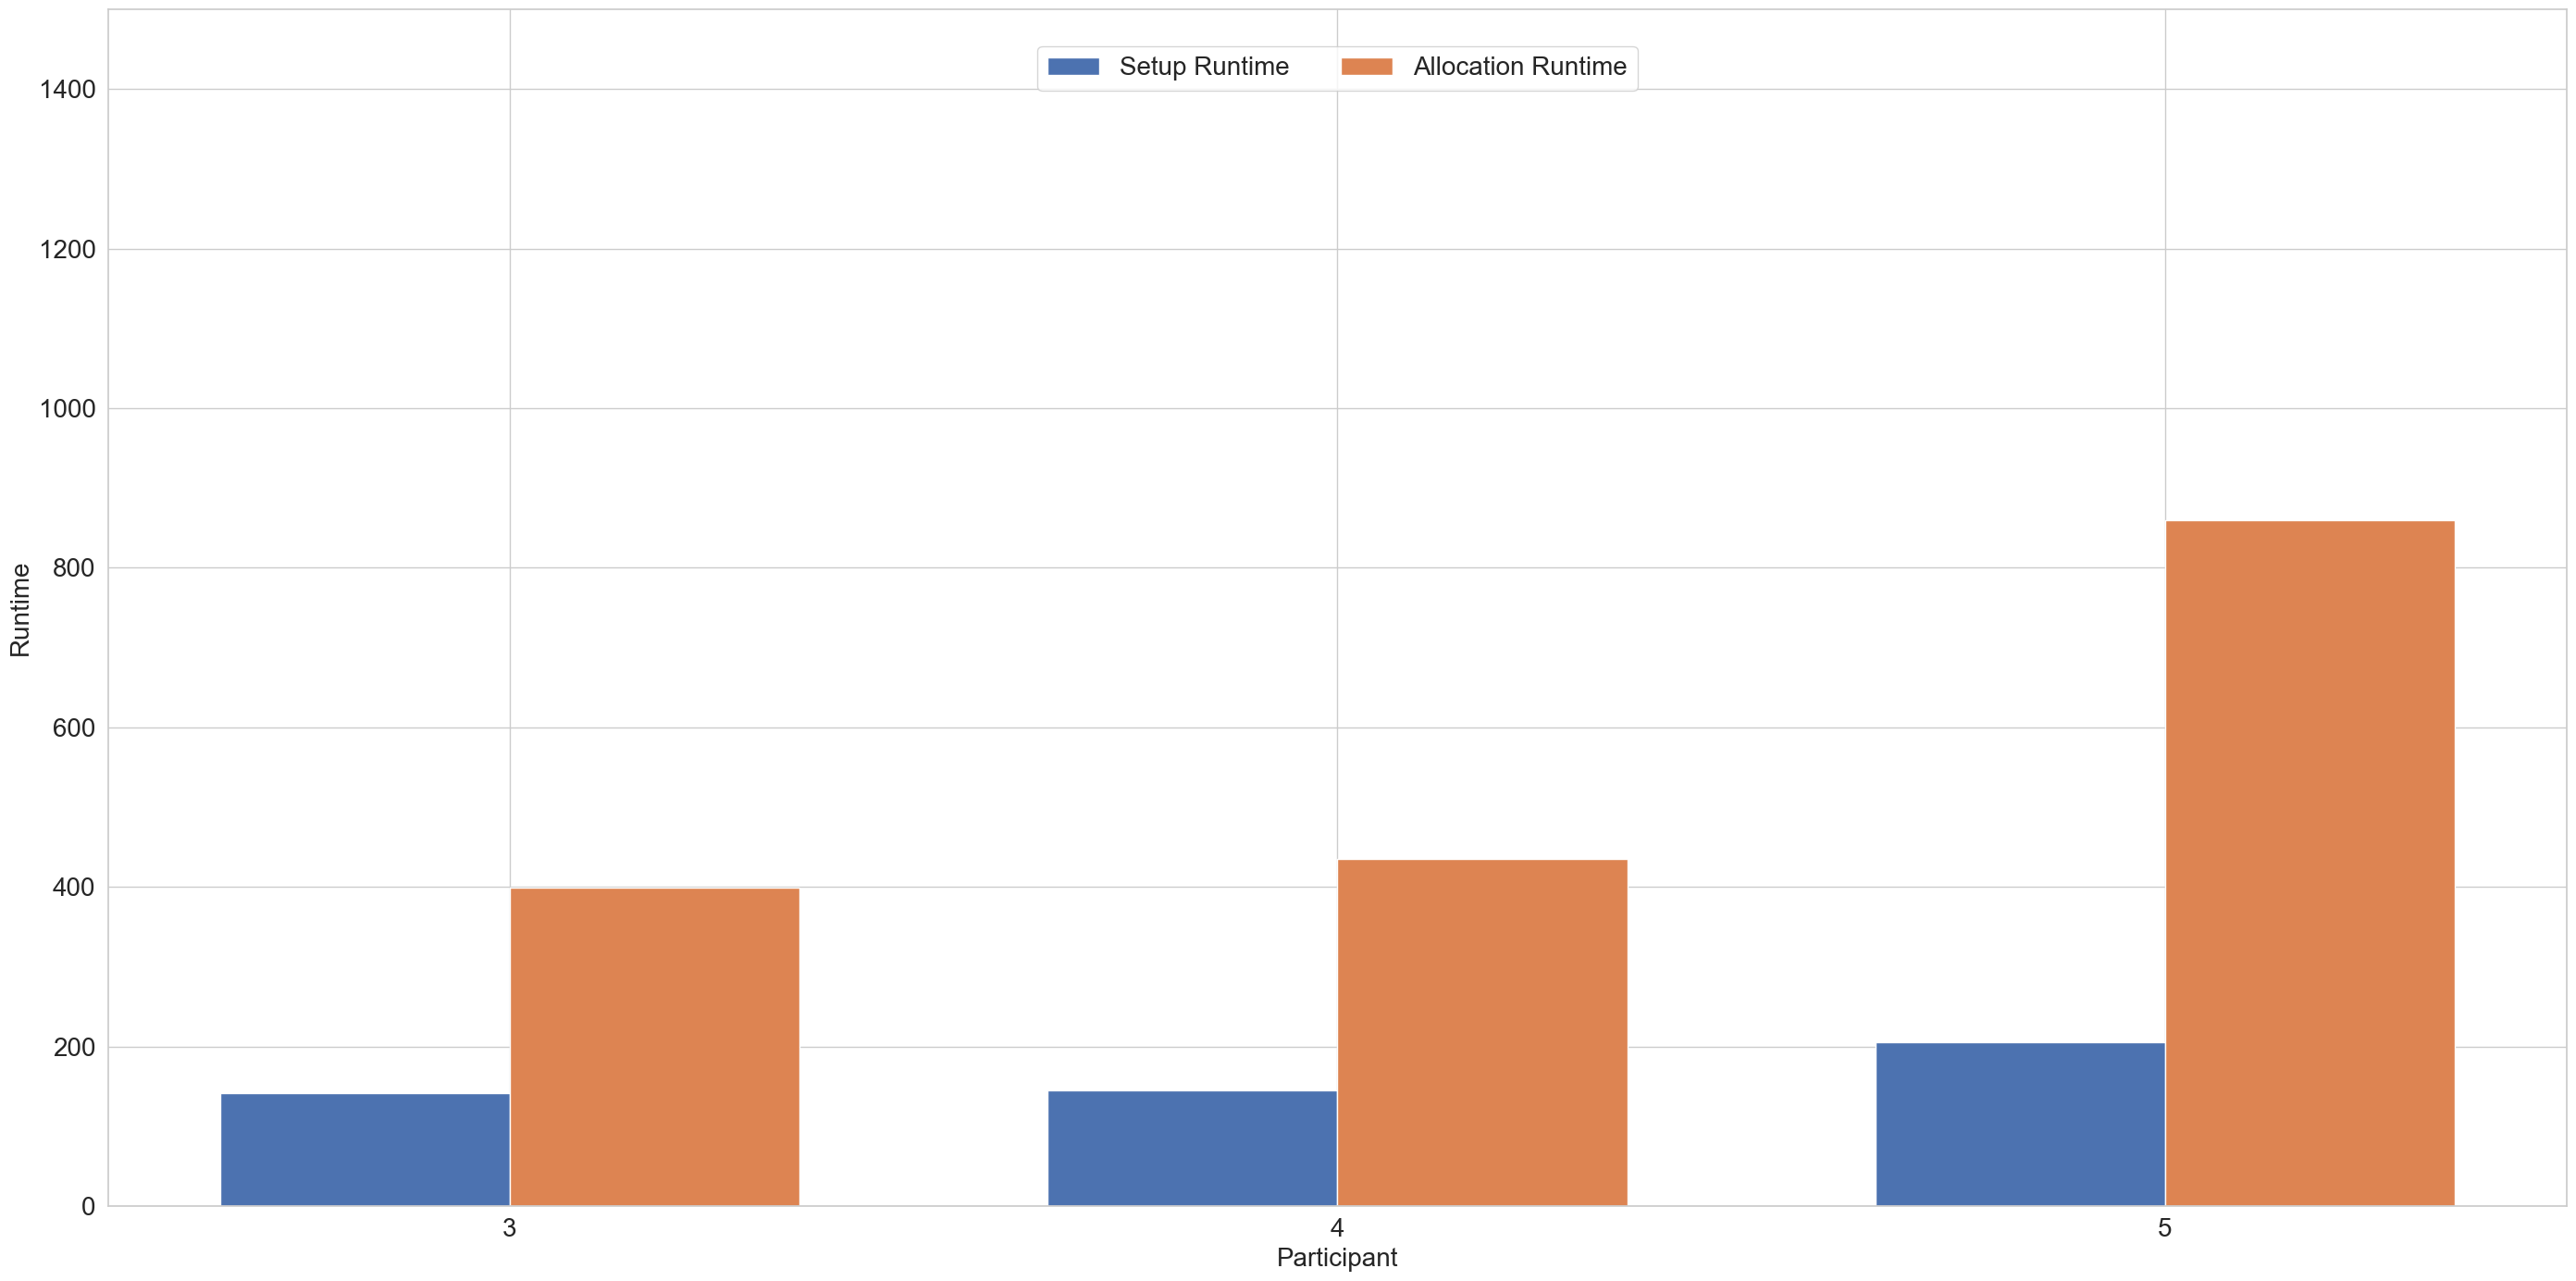

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Extract data
participants = list(result.keys())
setup_runtime = [result[p][0] for p in participants]
allocation_runtime = [result[p][1] for p in participants]

# Bar settings
x = range(len(participants))
width = 0.35  # width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(28, 14))
ax.bar([i - width/2 for i in x], setup_runtime, width, label='Setup Runtime')
ax.bar([i + width/2 for i in x], allocation_runtime, width, label='Allocation Runtime')

# Labels and title
ax.set_xlabel('Participant', fontsize=20)
ax.set_ylabel('Runtime', fontsize=20)

# Set y-axis limit
ax.set_ylim(top=1500)

# Set tick font sizes
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Legend below the title with larger font
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=2, fontsize=20)

# X-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(participants)

# Layout adjustment
plt.tight_layout()
plt.show()


In [ ]:
DSC_instance = DSCPlatform(
    config_path="DSC\config\config_full.yaml", 
    dataset_path="dataset",
    robustness= "breadth",
    verbose= True
)

result_br = DSC_instance.evaluate_runtime()
result_br

[2025-04-12 15:02:34] INITIATING 	 CONFIG: DSC\config\config_full.yaml
[2025-04-12 15:02:34] INITIATING 	 CONFIG: DSC\config\config_3.yaml
[2025-04-12 15:03:17] PARTICIPANT 0 	 PAYOFF:0.8806584362139918
[2025-04-12 15:03:53] PARTICIPANT 1 	 PAYOFF:0.8768961493582264
[2025-04-12 15:04:31] PARTICIPANT 2 	 PAYOFF:0.8670187229956793
[2025-04-12 15:04:31] SETUP 		 RUNTIME: 116.96s.
[2025-04-12 15:05:39] CONSORTIUM 	 PAYOFF:0.8782112274024738
[2025-04-12 15:08:49] PARTICIPANT 2  	 DOWNGRADE PAYOFF DIFF:-0.00136
[2025-04-12 15:08:49] REMOVE 		 PARTICIPANT 2
[2025-04-12 15:10:05] PARTICIPANT 1  	 DOWNGRADE PAYOFF DIFF:-0.00109
[2025-04-12 15:10:05] REMOVE 		 PARTICIPANT 1
[2025-04-12 15:10:43] ALLOCATION 	 RUNTIME: 371.86s.
[2025-04-12 15:10:43] INITIATING 	 CONFIG: DSC\config\config_4.yaml
[2025-04-12 15:11:21] PARTICIPANT 0 	 PAYOFF:0.8806584362139918
[2025-04-12 15:12:01] PARTICIPANT 1 	 PAYOFF:0.8768961493582264
[2025-04-12 15:12:41] PARTICIPANT 2 	 PAYOFF:0.8670187229956793
[2025-04-12 15

{3: [116.96309065818787, 371.85942125320435],
 4: [164.30297470092773, 839.6746044158936],
 5: [298.9474811553955, 1444.4325497150421]}

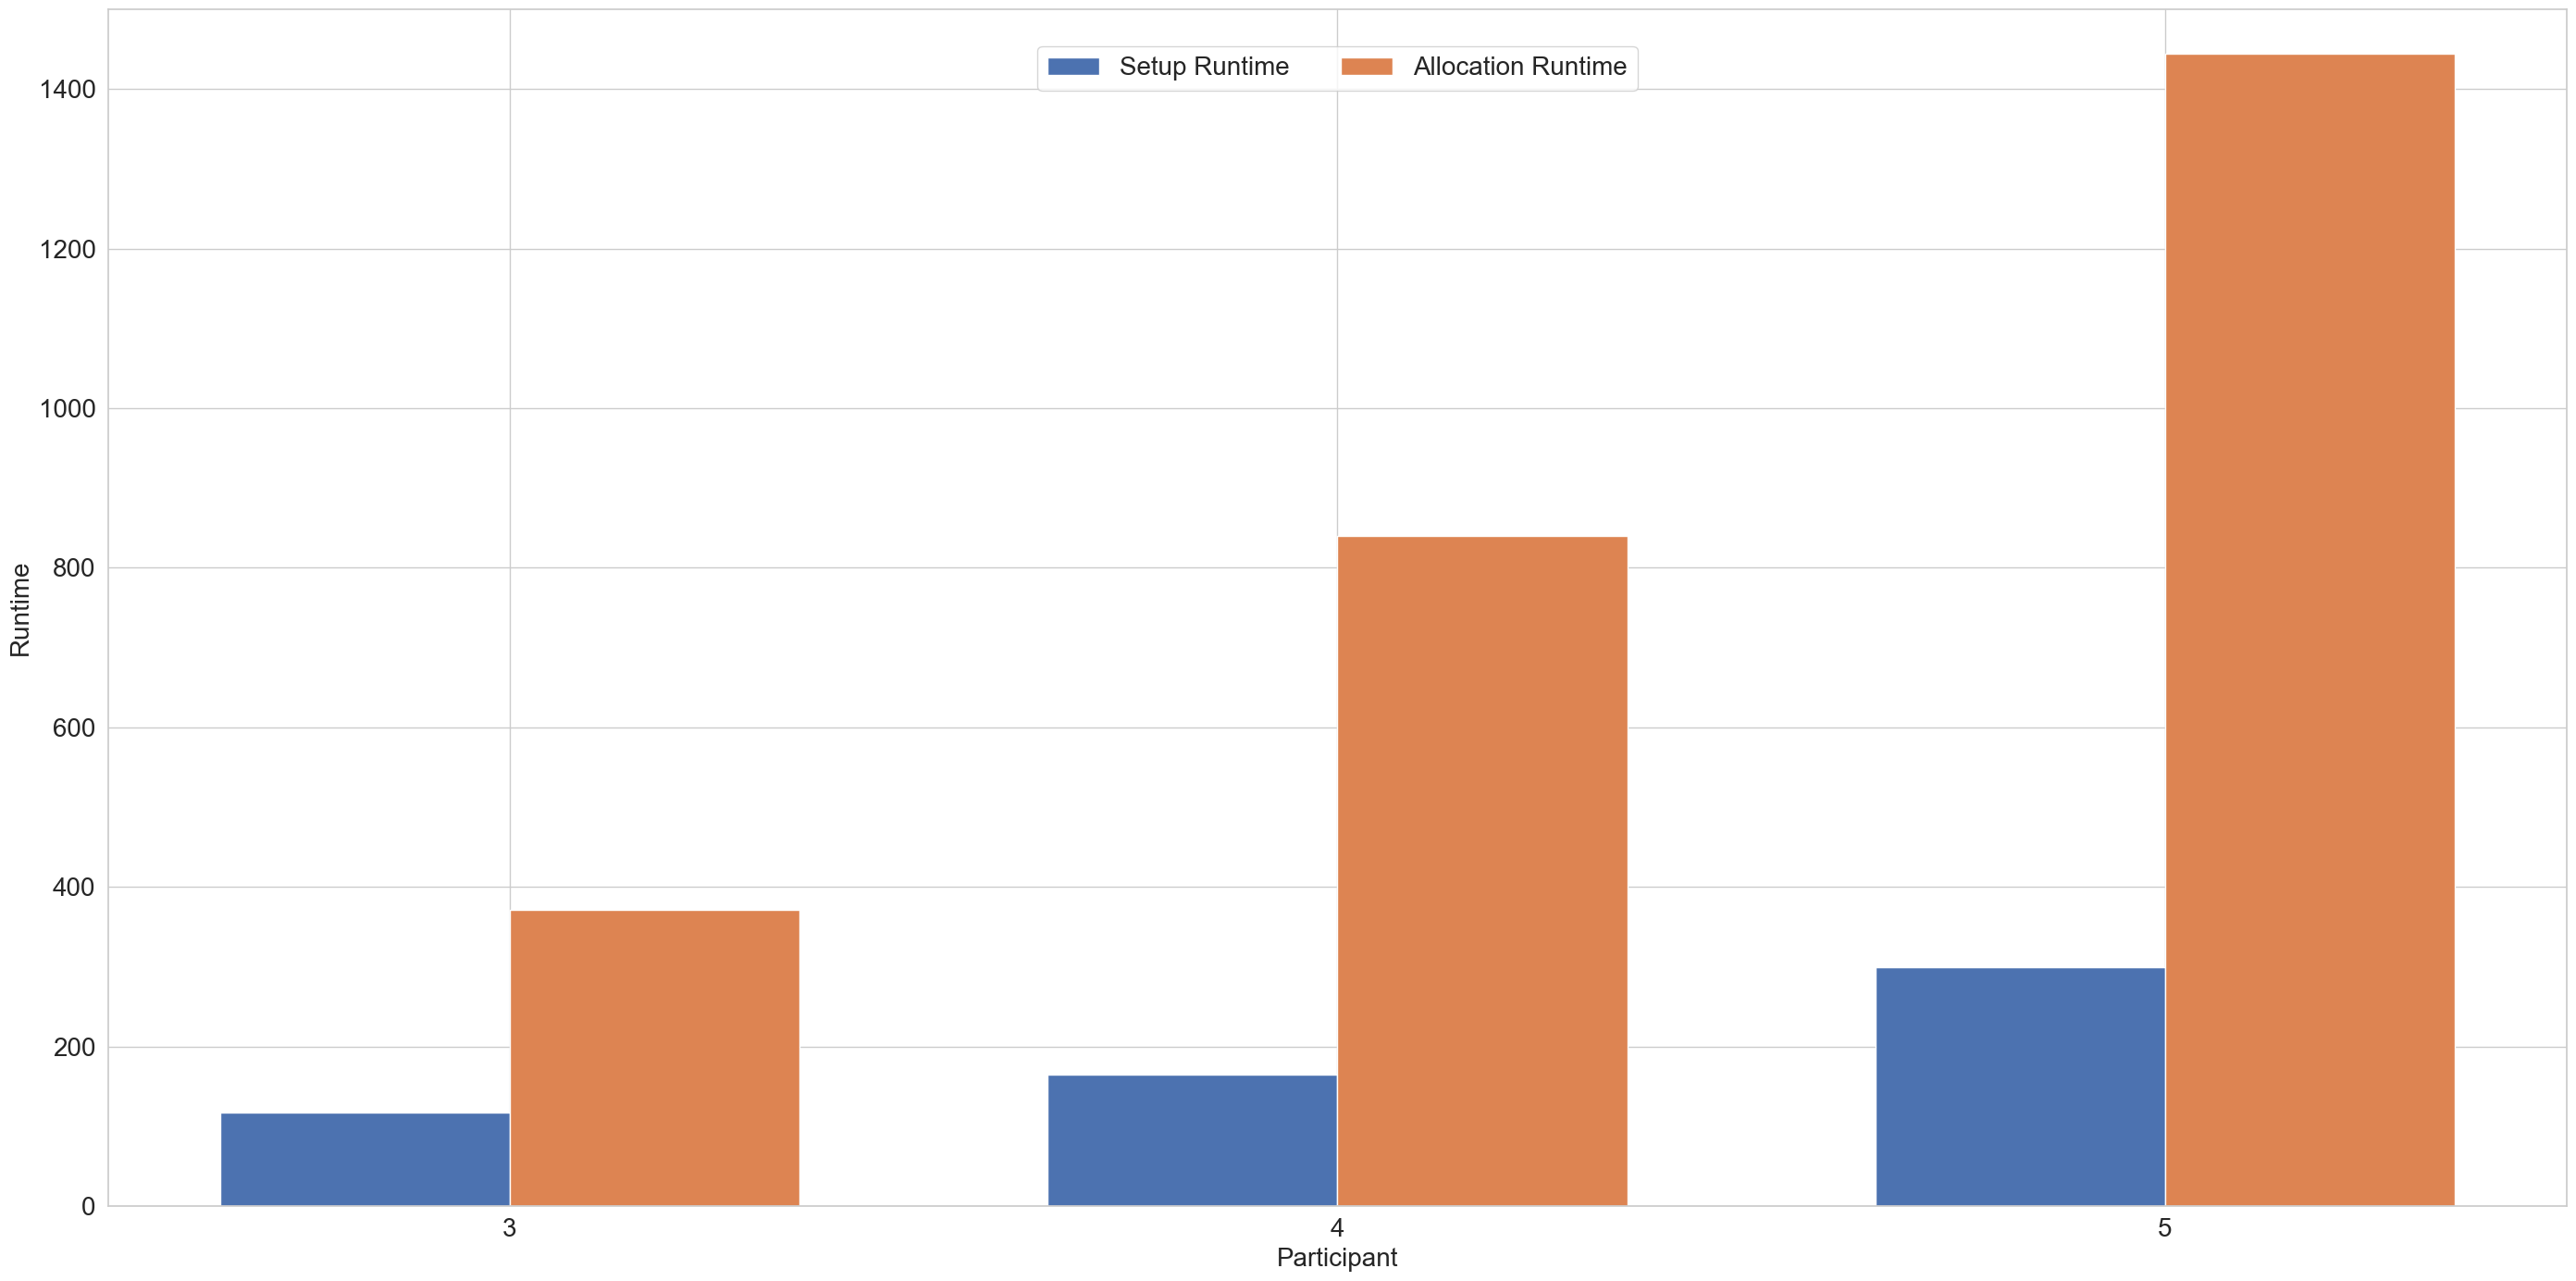

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Extract data
participants = list(result_br.keys())
setup_runtime = [result_br[p][0] for p in participants]
allocation_runtime = [result_br[p][1] for p in participants]

# Bar settings
x = range(len(participants))
width = 0.35  # width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(28, 14))
ax.bar([i - width/2 for i in x], setup_runtime, width, label='Setup Runtime')
ax.bar([i + width/2 for i in x], allocation_runtime, width, label='Allocation Runtime')

# Labels and title
ax.set_xlabel('Participant', fontsize=20)
ax.set_ylabel('Runtime', fontsize=20)

# Set y-axis limit
ax.set_ylim(top=1500)

# Set tick font sizes
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Legend below the title with larger font
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=2, fontsize=20)

# X-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(participants)

# Layout adjustment
plt.tight_layout()
plt.show()


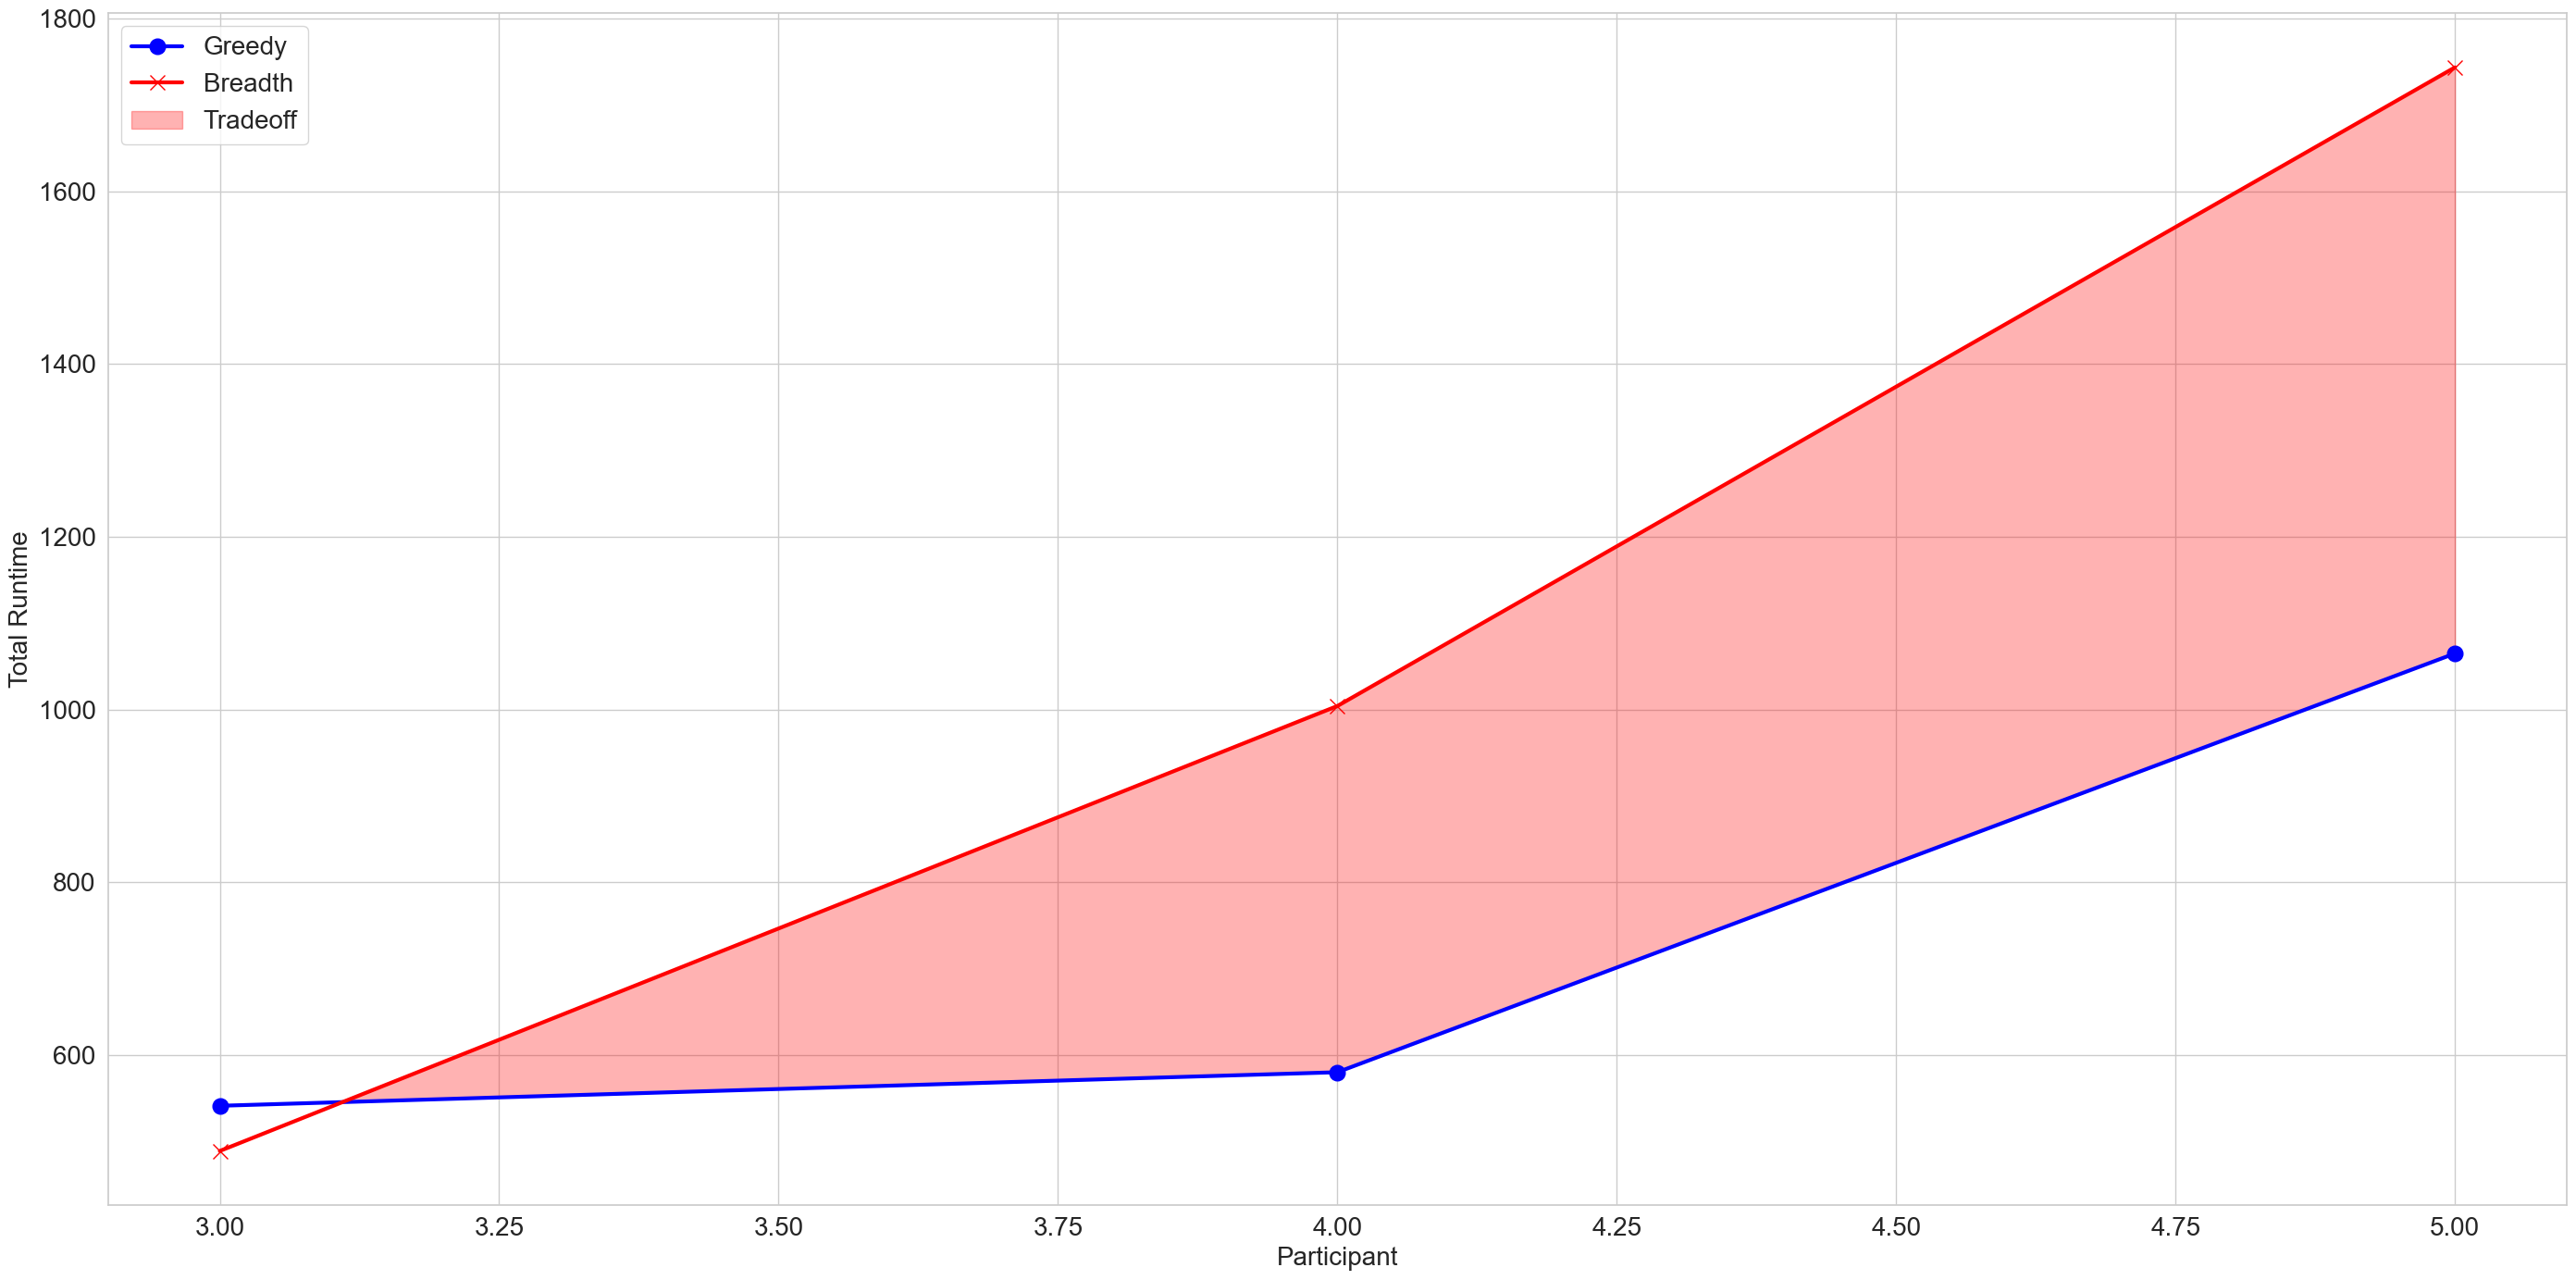

In [ ]:
import matplotlib.pyplot as plt

# Prepare data
x = list(result.keys())
y1 = [sum(result[k]) for k in x]
y2 = [sum(result_br[k]) for k in x]

# Create plot with larger size
fig, ax = plt.subplots(figsize=(28, 14))
ax.plot(x, y1, marker='o', label="Greedy", color='blue', linewidth=3, markersize=12)
ax.plot(x, y2, marker='x', label='Breadth', color='red', linewidth=3, markersize=12)

# Labels and title
ax.set_xlabel('Participant', fontsize=20)
ax.set_ylabel('Total Runtime', fontsize=20)
# ax.set_title('Total Runtime per Participant', fontsize=24)

# Fill between y1 and y2 with red where y2 > y1
ax.fill_between(x, y1, y2, where=[y2i > y1i for y1i, y2i in zip(y1, y2)],
                interpolate=True, color='red', alpha=0.3, label='Tradeoff')

# Tick label sizes
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Grid, legend, and layout
ax.grid(True)
ax.legend(fontsize=20)
plt.tight_layout()
plt.show()


In [ ]:
print(f"Runtime Tradeoff : {sum(result_br[5])/sum(result[5]):.2f}")